# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

**1. Загрузить датасет**

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [7]:
print('Кол-во отсутствующих значений - ',data.isnull().sum().sum())

Кол-во отсутствующих значений -  0


**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

0    284315
1       492
Name: Class, dtype: int64


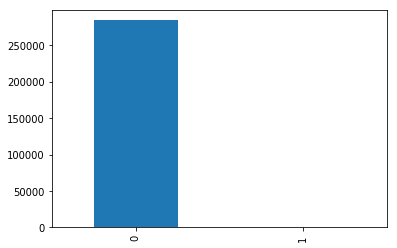

In [11]:
print(data.Class.value_counts())
data.Class.value_counts().plot(kind = 'bar')

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [33]:
x,y = data.groupby('Class')['Amount'].sum()
print('Объем денег в нормальных операциях - {:.2f}'.format(x))
print('Объем денег в обманных операциях - {:.2f}'.format(y))

Объем денег в нормальных операциях - 25102462.04
Объем денег в обманных операциях - 60127.97


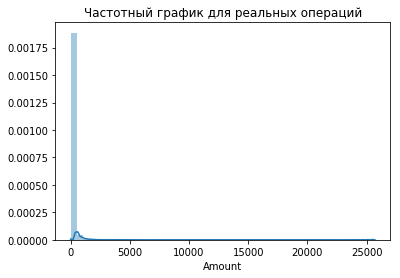

In [20]:
sns.distplot(data.Amount[data.Class == 0])
plt.title('Частотный график для реальных операций')
plt.show()

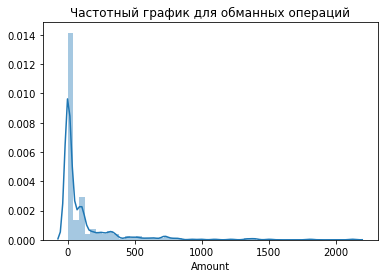

In [22]:
sns.distplot(data.Amount[data.Class == 1])
plt.title('Частотный график для обманных операций')
plt.show()

**5. Построить графики histograms для всех значений**

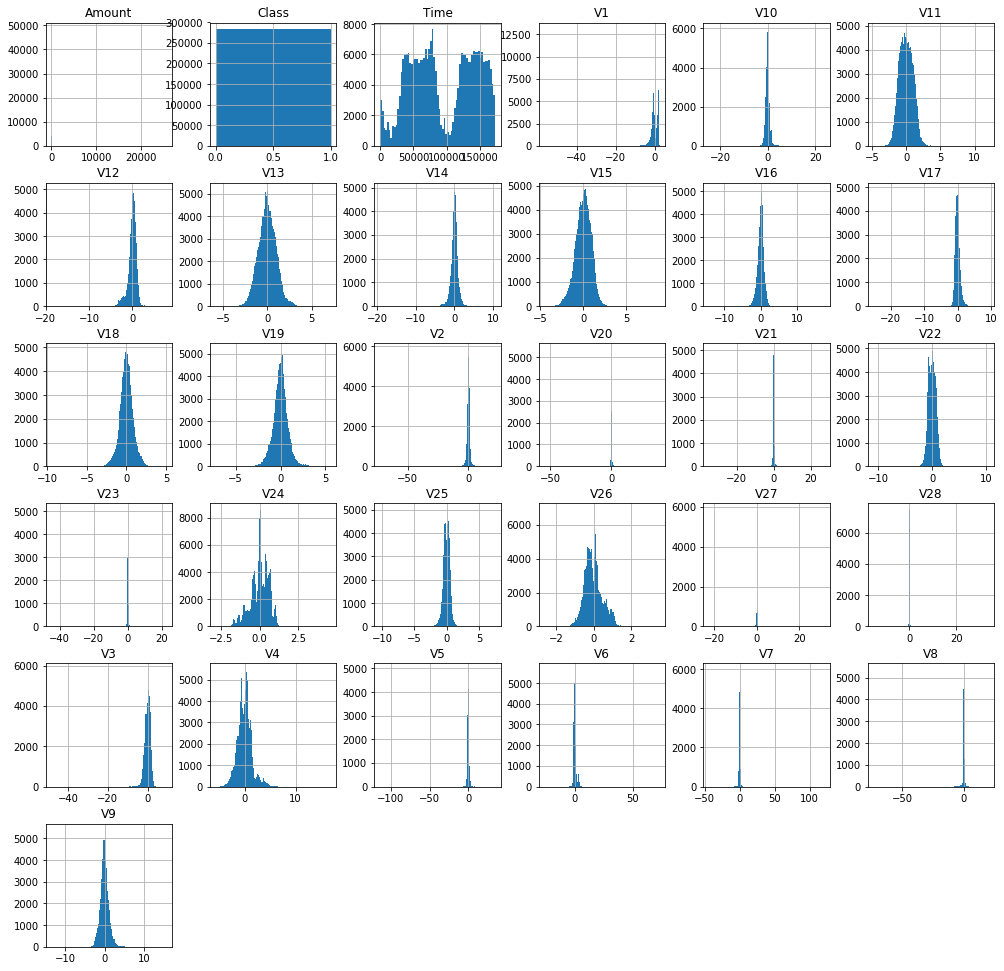

In [35]:
data.hist(figsize=(17,17),bins='auto')
plt.show()

**6. Построить матрицу корреляций для всех значений**

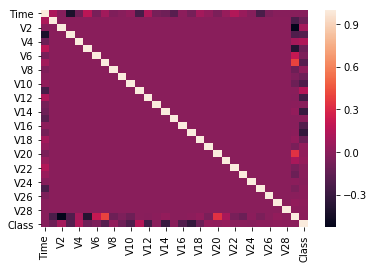

In [48]:
sns.heatmap(data.corr())

In [49]:
print(data.corr())
print('Большая часть признаков почти не коррелирует между собой')

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17   
V2     -0.010593  4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16   
V3     -0.419618 -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16   
V4     -0.105260  1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00   
V5      0.173072  6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15   
V6     -0.063016  2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16   
V7      0.084714  1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16   
V8     -0.036949 -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16   
V9     -0.008660  2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16   
V10     0.030617  7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16   
V11    -0.247689  2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16   
V12     0.12

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель линейной регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [128]:
print('Из матрицы корреляций выберем максимально коррелирующие с Target value признаки : V14, V17, V12, V7, V3, V4, V11, V19, V20')

Из матрицы корреляций выберем максимально коррелирующие с Target value признаки : V14, V17, V12, V7, V3, V4, V11, V19, V20


In [130]:
model = LinearRegression()
X = data[['V14', 'V17', 'V12', 'V7', 'V3', 'V4', 'V11', 'V19', 'V20']]
y = data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
train_model = model.fit(X_train, y_train)
prediction = model.predict(X_test)
model.score(X_test,y_test)

0.37275419593498854

In [ ]:
print('Качество модели очень низкое, на результат влияет большой дисбаланс в target value')

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать линейную регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [141]:
sample = data[['V14', 'V17', 'V12', 'V7', 'V3', 'V4', 'V11', 'V19', 'V20','Class']].sample(n = len(data[data.Class == 1]), random_state = 777)
sample = sample.append(data[['V14', 'V17', 'V12', 'V7', 'V3', 'V4', 'V11', 'V19', 'V20','Class']][data.Class == 1])

model = LinearRegression()
X = sample[['V14', 'V17', 'V12', 'V7', 'V3', 'V4', 'V11', 'V19', 'V20']]
y = sample.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
train_model = model.fit(X_train, y_train)
prediction = model.predict(X_test)
model.score(X_test,y_test)

0.5573999978426204

In [125]:
print('Модель показала лучше результат. Т.е. при сбалансированной выборке классов их удается лушче разделить по отобранным признакам')

Модель показала значительно лучше результат. Т.е. при сбалансированной выборке классов их удается хорошо разделить по отобранным признакам


**9. Построить boxplot графики для 4ех негативно коррелирующих элементов и 4 позитивно коррелирующих элементов для полученного в шаге 8 датасете.** Пример boxplot:

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])

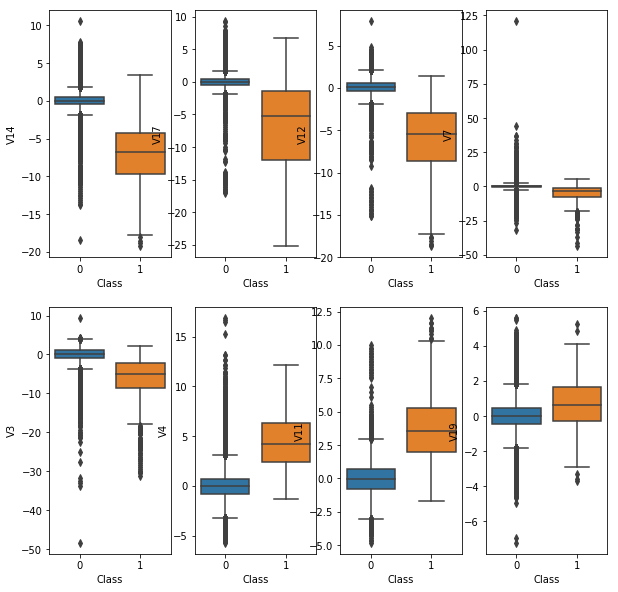

In [168]:
columns = data[['V14', 'V17', 'V12', 'V7', 'V3', 'V4', 'V11', 'V19', 'V20','Class']].columns
df = data[['V14', 'V17', 'V12', 'V7', 'V3', 'V4', 'V11', 'V19', 'V20','Class']]
f, axes = plt.subplots(2, 4, figsize=(10, 10))

sns.boxplot(x="Class", y="V14", data=df,ax = axes[0,0])
sns.boxplot(x="Class", y="V17", data=df,ax = axes[0,1])
sns.boxplot(x="Class", y="V12", data=df,ax = axes[0,2])
sns.boxplot(x="Class", y="V7", data=df,ax = axes[0,3])
sns.boxplot(x="Class", y="V3", data=df,ax = axes[1,0])
sns.boxplot(x="Class", y="V4", data=df,ax = axes[1,1])
sns.boxplot(x="Class", y="V11", data=df,ax = axes[1,2])
sns.boxplot(x="Class", y="V19", data=df,ax = axes[1,3])

**10. Из графиков, полученных на предыдущем шаге, убрать выбросы методом выборки элементов из интерквартильного интервала (взять только те элементы, которые находятся квартилем 0.25 и квартилем 0.75).** Посчитать качество модели и сравнить с предыдущим. Получилось ли улучшить модель? Почему?

In [183]:
df = data[['V14', 'V17', 'V12', 'V7', 'V3', 'V4', 'V11', 'V19', 'V20','Class']]
df2 = df[(df>=df.quantile(0.25,axis=0))&(df<=df.quantile(0.75,axis=0))]
df2.head()

,V14,V17,V12,V7,V3,V4,V11,V19,V20,Class
0,-0.311169,0.207971,NaN,0.239599,NaN,NaN,-0.551600,0.403993,NaN,0.0
1,-0.143772,-0.114805,NaN,-0.078803,0.16648,0.448154,NaN,-0.145783,-0.069083,0.0
2,-0.165946,NaN,0.066084,NaN,NaN,0.379780,0.624501,NaN,NaN,0.0
3,-0.287924,NaN,0.178228,0.237609,NaN,NaN,-0.226487,NaN,-0.208038,0.0
4,NaN,-0.237033,0.538196,NaN,NaN,0.403034,NaN,NaN,NaN,0.0


In [186]:
df2 = df2.dropna()

In [187]:
model = LinearRegression()
X = df2[['V14', 'V17', 'V12', 'V7', 'V3', 'V4', 'V11', 'V19', 'V20']]
y = df2.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
train_model = model.fit(X_train, y_train)
prediction = model.predict(X_test)
model.score(X_test,y_test)

1.0

In [191]:
df2[df.Class == 1]

,V14,V17,V12,V7,V3,V4,V11,V19,V20,Class


In [192]:
print('Модель смогла точно определить тип операции, потому что все обманные операции выпали из новой выборки. Т.е. обманные операции сильно отличаются от регулярных операций')

Модель смогла точно определить тип операции, потому что все обманные операции выпали из новой выборки. Т.е. обманные операции сильно отличаются от регулярных операций
